# 3장 파이썬을 이용한 데이터 분석

## 3.3 matplotlib과 seaborn을 이용한 데이터 시각화

### 시각화를 위한 준비

In [1]:
# 수치 계산 라이브리러
import numpy as np
import pandas as pd

# 표시 자릿수 지정
%precision 3

# 그래프 그리는 라이브러리
from matplotlib import pyplot as plt

# 그래프를 주피터 노트북에 그리기 위한 설정
%matplotlib inline

### pyplot을 이용한 꺾은선 그래프

In [2]:
x = np.array([0,1,2,3,4,5,6,7,8,9])
y = np.array([2,3,4,3,5,4,6,7,4,8])

Text(0, 0.5, 'y')

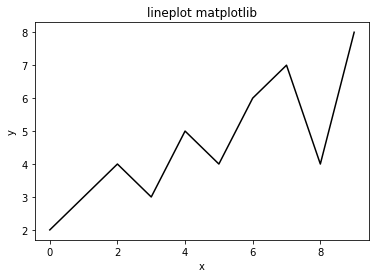

In [3]:
plt.plot(x, y, color = 'black')
plt.title("lineplot matplotlib")
plt.xlabel("x")
plt.ylabel("y")

### seaborn과 pyplot을 이용한 꺾은선 그래프

In [4]:
import seaborn as sns
sns.set()

Text(0, 0.5, 'y')

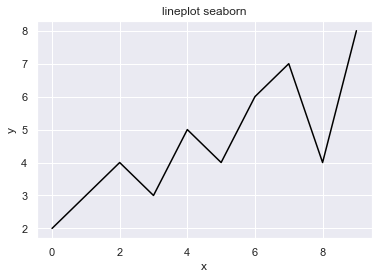

In [5]:
plt.plot(x, y, color = 'black')
plt.title("lineplot seaborn")
plt.xlabel("x")
plt.ylabel("y")

### seaborn을 이용한 히스토그램

In [6]:
fish_data = np.array([2,3,3,4,4,4,4,5,5,6])
fish_data

array([2, 3, 3, 4, 4, 4, 4, 5, 5, 6])

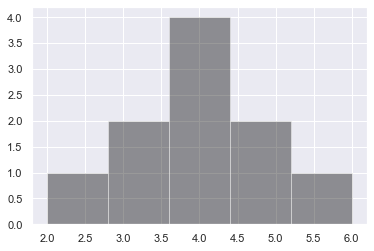

In [11]:
sns.distplot(fish_data, bins = 5, 
             color = 'black', kde = False)

### 커널밀도추정에 따른 히스토그램 평활화 평활화

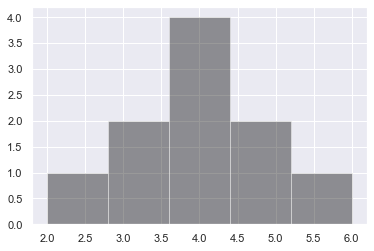

In [17]:
sns.distplot(fish_data, bins = 5, 
             color = 'black', kde = False) #bin이 한개

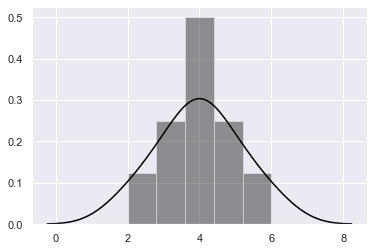

In [18]:
sns.distplot(fish_data, bins = 5, 
             color = 'black', kde = True)

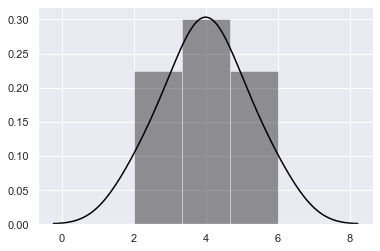

In [13]:
sns.distplot(fish_data, color = 'black') #그려지는게 디폴트값

### 2변량 데이터에 대한 히스토그램

In [20]:
fish_multi = pd.read_csv("3-3-2-fish_multi_2.csv")
print(fish_multi)

   species  length
0        A       2
1        A       3
2        A       3
3        A       4
4        A       4
5        A       4
6        A       4
7        A       5
8        A       5
9        A       6
10       B       5
11       B       6
12       B       6
13       B       7
14       B       7
15       B       7
16       B       7
17       B       8
18       B       8
19       B       9


In [21]:
print(fish_multi.groupby("species").describe())

        length                                          
         count mean       std  min   25%  50%   75%  max
species                                                 
A         10.0  4.0  1.154701  2.0  3.25  4.0  4.75  6.0
B         10.0  7.0  1.154701  5.0  6.25  7.0  7.75  9.0


In [28]:
a= fish_multi.query('species=="A"')
a

,species,length
0,A,2
1,A,3
2,A,3
3,A,4
4,A,4
5,A,4
6,A,4
7,A,5
8,A,5
9,A,6


In [30]:
# 데이터를 물고기의 종류별로 분리
length_a = fish_multi.query('species == "A"')["length"]
length_b = fish_multi.query('species == "B"')["length"]
length_a

0    2
1    3
2    3
3    4
4    4
5    4
6    4
7    5
8    5
9    6
Name: length, dtype: int64

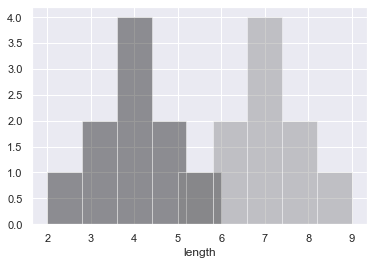

In [31]:
# 히스토그램 2번 그리기
sns.distplot(length_a, bins = 5, 
             color = 'black', kde = False)
sns.distplot(length_b, bins = 5, 
             color = 'gray', kde = False)

### 상자그림

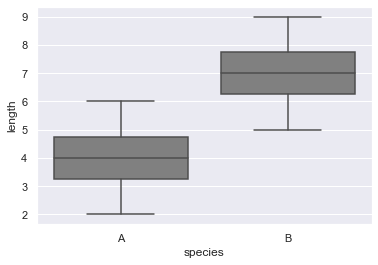

In [32]:
# 상자그림
sns.boxplot(x = "species", y  = "length", 
            data = fish_multi, color = 'gray')

In [33]:
fish_multi.groupby("species").describe()

length                                          
         count mean       std  min   25%  50%   75%  max
species                                                 
A         10.0  4.0  1.154701  2.0  3.25  4.0  4.75  6.0
B         10.0  7.0  1.154701  5.0  6.25  7.0  7.75  9.0

### 바이올린플롯

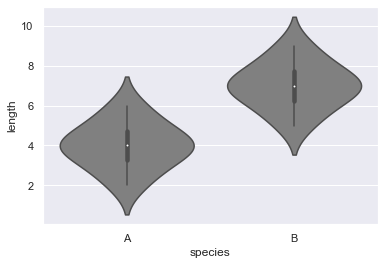

In [34]:
sns.violinplot(x = "species", y  = "length", 
               data = fish_multi, color = 'gray')

### 막대그래프

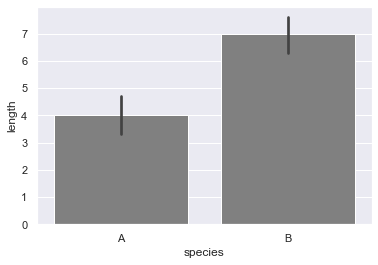

In [35]:
sns.barplot(x = "species", y  = "length", 
            data = fish_multi, color = 'gray')

### 산포도

In [36]:
cov_data = pd.read_csv("3-2-3-cov.csv")
print(cov_data)

      x   y
0  18.5  34
1  18.7  39
2  19.1  41
3  19.7  38
4  21.5  45
5  21.7  41
6  21.8  52
7  22.0  44
8  23.4  44
9  23.8  49


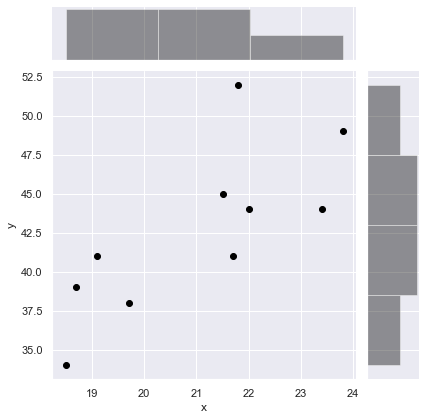

In [37]:
sns.jointplot(x = "x", y = "y", 
              data = cov_data, color = 'black')

### 페어플롯

In [38]:
# seaborn 내장 붓꽃 데이터 검색
iris = sns.load_dataset("iris")
iris.head(n = 3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [39]:
# 붓꽃의 종류별 특징 별 평균
iris.groupby("species").mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


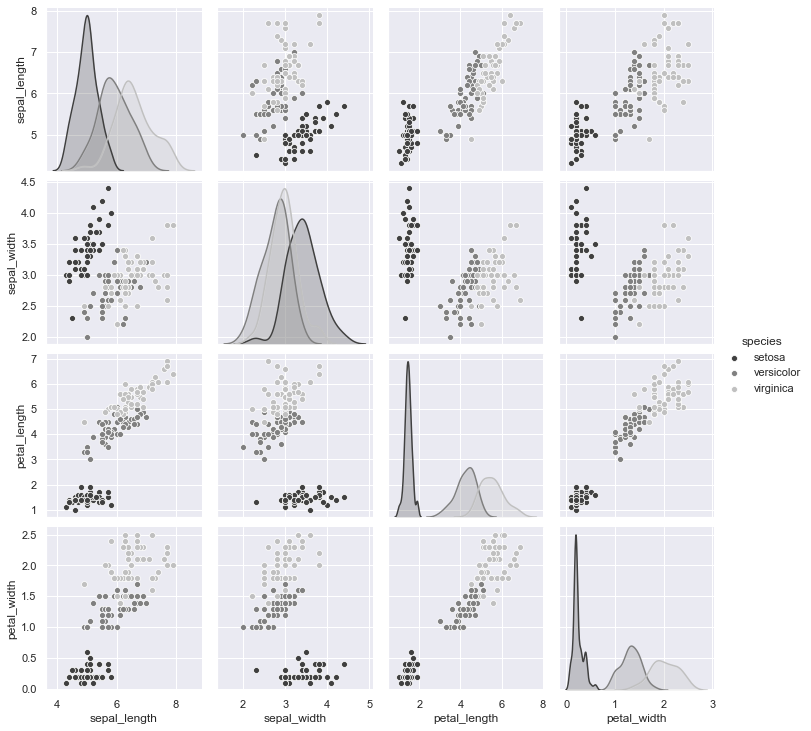

In [40]:
# 페어플롯
sns.pairplot(iris, hue="species", palette='gray')